# Final Project - Julien Fresnel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [2]:
train_data = pd.read_csv(filepath_or_buffer = "train.csv", sep=',')

Let's see what the datas look like : 

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Here is the train dataset, as you can see this dataset is composed by 12 columns and 891 rows

the "Survived" columns is the one associated to the label, this what we have to predict. Then we have others parameters such as : 

- PassengerID : This is the ID of the passenger
- Name : This is the name of the passenger
- Sex : Binary parameter : male or female 
- Age : This is the age of the passenger
- SibSp : Number of siblings and spouse in the boat 
- Parch : Number of parents and children in the boat 
- Ticket : is the Ticket ID
- Fare : this is the price that the passenger paid 
- Cabin : Cabin numbrt 
- Embarked : port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) 

First, we have to prepare and clean our data. We don't need to use all the columns of the dataset. So, to get started, we're going to drop some columns : Name, Ticket, Cabin, Embarked and PassengerID

In [4]:
train_data.drop(['PassengerId', 'Name','Ticket', 'Cabin','Embarked','Age','Fare','Parch','SibSp'], axis=1, inplace=True)
train_data

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male
...,...,...,...
886,0,2,male
887,1,1,female
888,0,3,female
889,1,1,male


Now we're watching infos of the dataset

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
dtypes: int64(2), object(1)
memory usage: 21.0+ KB


In [6]:
train_data.nunique(axis=0)

Survived    2
Pclass      3
Sex         2
dtype: int64

Let's drop NaN values

In [7]:
train_data = train_data.dropna()
print(f"New shape : {train_data.shape}")

New shape : (891, 3)


We're gonna replace "male" and "female" value by 1 and 0

In [8]:
train_data.replace({'Sex' :{"male" : 1, "female" :0}}, inplace=True)
train_data

,Survived,Pclass,Sex
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1
...,...,...,...
886,0,2,1
887,1,1,0
888,0,3,0
889,1,1,1


Let's see the missing values

In [9]:
null_count_val = train_data.isnull().sum()
null_count_val

Survived    0
Pclass      0
Sex         0
dtype: int64

At this moment we have 714 rows which compose our dataset to train the model. But we have to drop "Survived" column and save it in a dataframe which is the label dataset

In [10]:
y = pd.DataFrame(train_data["Survived"])
train_data.drop(['Survived'], axis=1, inplace=True)

In [11]:
train_data

,Pclass,Sex
0,3,1
1,1,0
2,3,0
3,1,0
4,3,1
...,...,...
886,2,1
887,1,0
888,3,0
889,1,1


In [12]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


Normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
for indexcol in range(train_data.shape[1]):
    normalizer = MinMaxScaler()
    train_data[train_data.columns[indexcol]] = normalizer.fit_transform(train_data[[train_data.columns[indexcol]]])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.15, random_state=1, stratify=y)
X_train

,Pclass,Sex
560,1.0,1.0
815,0.0,1.0
21,0.5,1.0
354,1.0,1.0
665,0.5,1.0
...,...,...
193,0.5,1.0
265,0.5,1.0
309,0.0,0.0
413,0.5,1.0


In [16]:
y_train

,Survived
560,0
815,0
21,1
354,0
665,0
...,...
193,1
265,0
309,1
413,0


Before beginning the training, let's visualize the dataset

In [17]:
plot_data = X_train.copy()
plot_data['survived'] = y_train
plot_data

,Pclass,Sex,survived
560,1.0,1.0,0
815,0.0,1.0,0
21,0.5,1.0,1
354,1.0,1.0,0
665,0.5,1.0,0
...,...,...,...
193,0.5,1.0,1
265,0.5,1.0,0
309,0.0,0.0,1
413,0.5,1.0,0


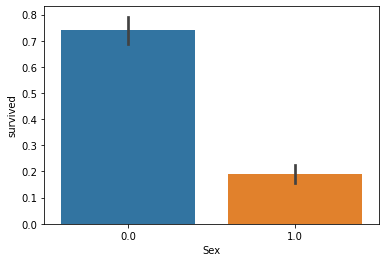

In [18]:
sns.barplot(x='Sex', y='survived', data=plot_data)
plt.show()

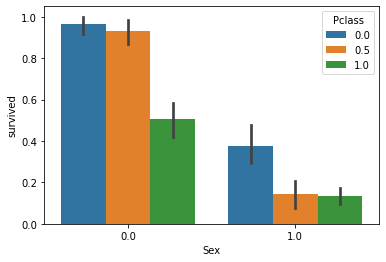

In [19]:
sns.barplot(x='Sex', y='survived', hue='Pclass', data=plot_data)
plt.show()

With this plots we can already conclude that majority of people who survived were female. 

Plus people had more chance to survive if they were in first class

## Decision Tree classification

### Training dataset

Now in order to predict if people survived or not we have to train a ML model. We choose to use Decision Tree classification.

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
y_predict = DT_classifier.predict(X_train)
y_predict

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_train,y_predict)
print(f'Accuracy : {accuracy}')

Accuracy : 0.7859973579920739


In [24]:
class_rep = classification_report(y_train,y_predict)
print(class_rep)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       466
           1       0.74      0.68      0.71       291

    accuracy                           0.79       757
   macro avg       0.78      0.77      0.77       757
weighted avg       0.78      0.79      0.78       757



In [25]:
confusion_mat = confusion_matrix(y_train,y_predict)
conf_mat = pd.DataFrame(confusion_mat)
conf_mat

,0,1
0,396,70
1,92,199


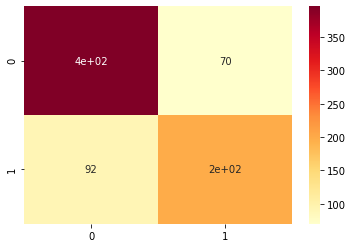

In [26]:
sns.heatmap(conf_mat, label=True, annot=True, cmap ='YlOrRd')
plt.show()

We got 98% accuracy with the training set. Now let see with the testing set

### Testing dataset


In [27]:
X_test

,Pclass,Sex
700,0.0,0.0
590,1.0,1.0
574,1.0,1.0
798,1.0,1.0
187,0.0,1.0
...,...,...
323,0.5,0.0
268,0.0,0.0
116,1.0,1.0
463,0.5,1.0


In [28]:
y_test_predict = DT_classifier.predict(X_test)
y_test_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0])

In [29]:
test_accuracy = accuracy_score(y_test,y_test_predict)
print(f'Accuracy : {test_accuracy}')

Accuracy : 0.7910447761194029


In [30]:
class_rep_test = classification_report(y_test,y_test_predict)
print(class_rep_test)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        83
           1       0.76      0.67      0.71        51

    accuracy                           0.79       134
   macro avg       0.78      0.77      0.77       134
weighted avg       0.79      0.79      0.79       134



In [31]:
confusion_matrix_test = confusion_matrix(y_test,y_test_predict)
conf_mat_test = pd.DataFrame(confusion_matrix_test)
conf_mat_test

,0,1
0,72,11
1,17,34


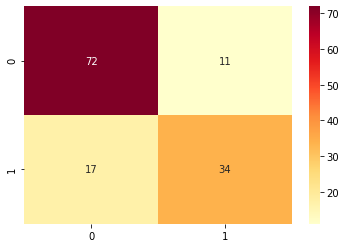

In [32]:
sns.heatmap(conf_mat_test, label=True, annot=True, cmap ='YlOrRd')
plt.show()

### Visualize decision tree

In [33]:
from sklearn import tree

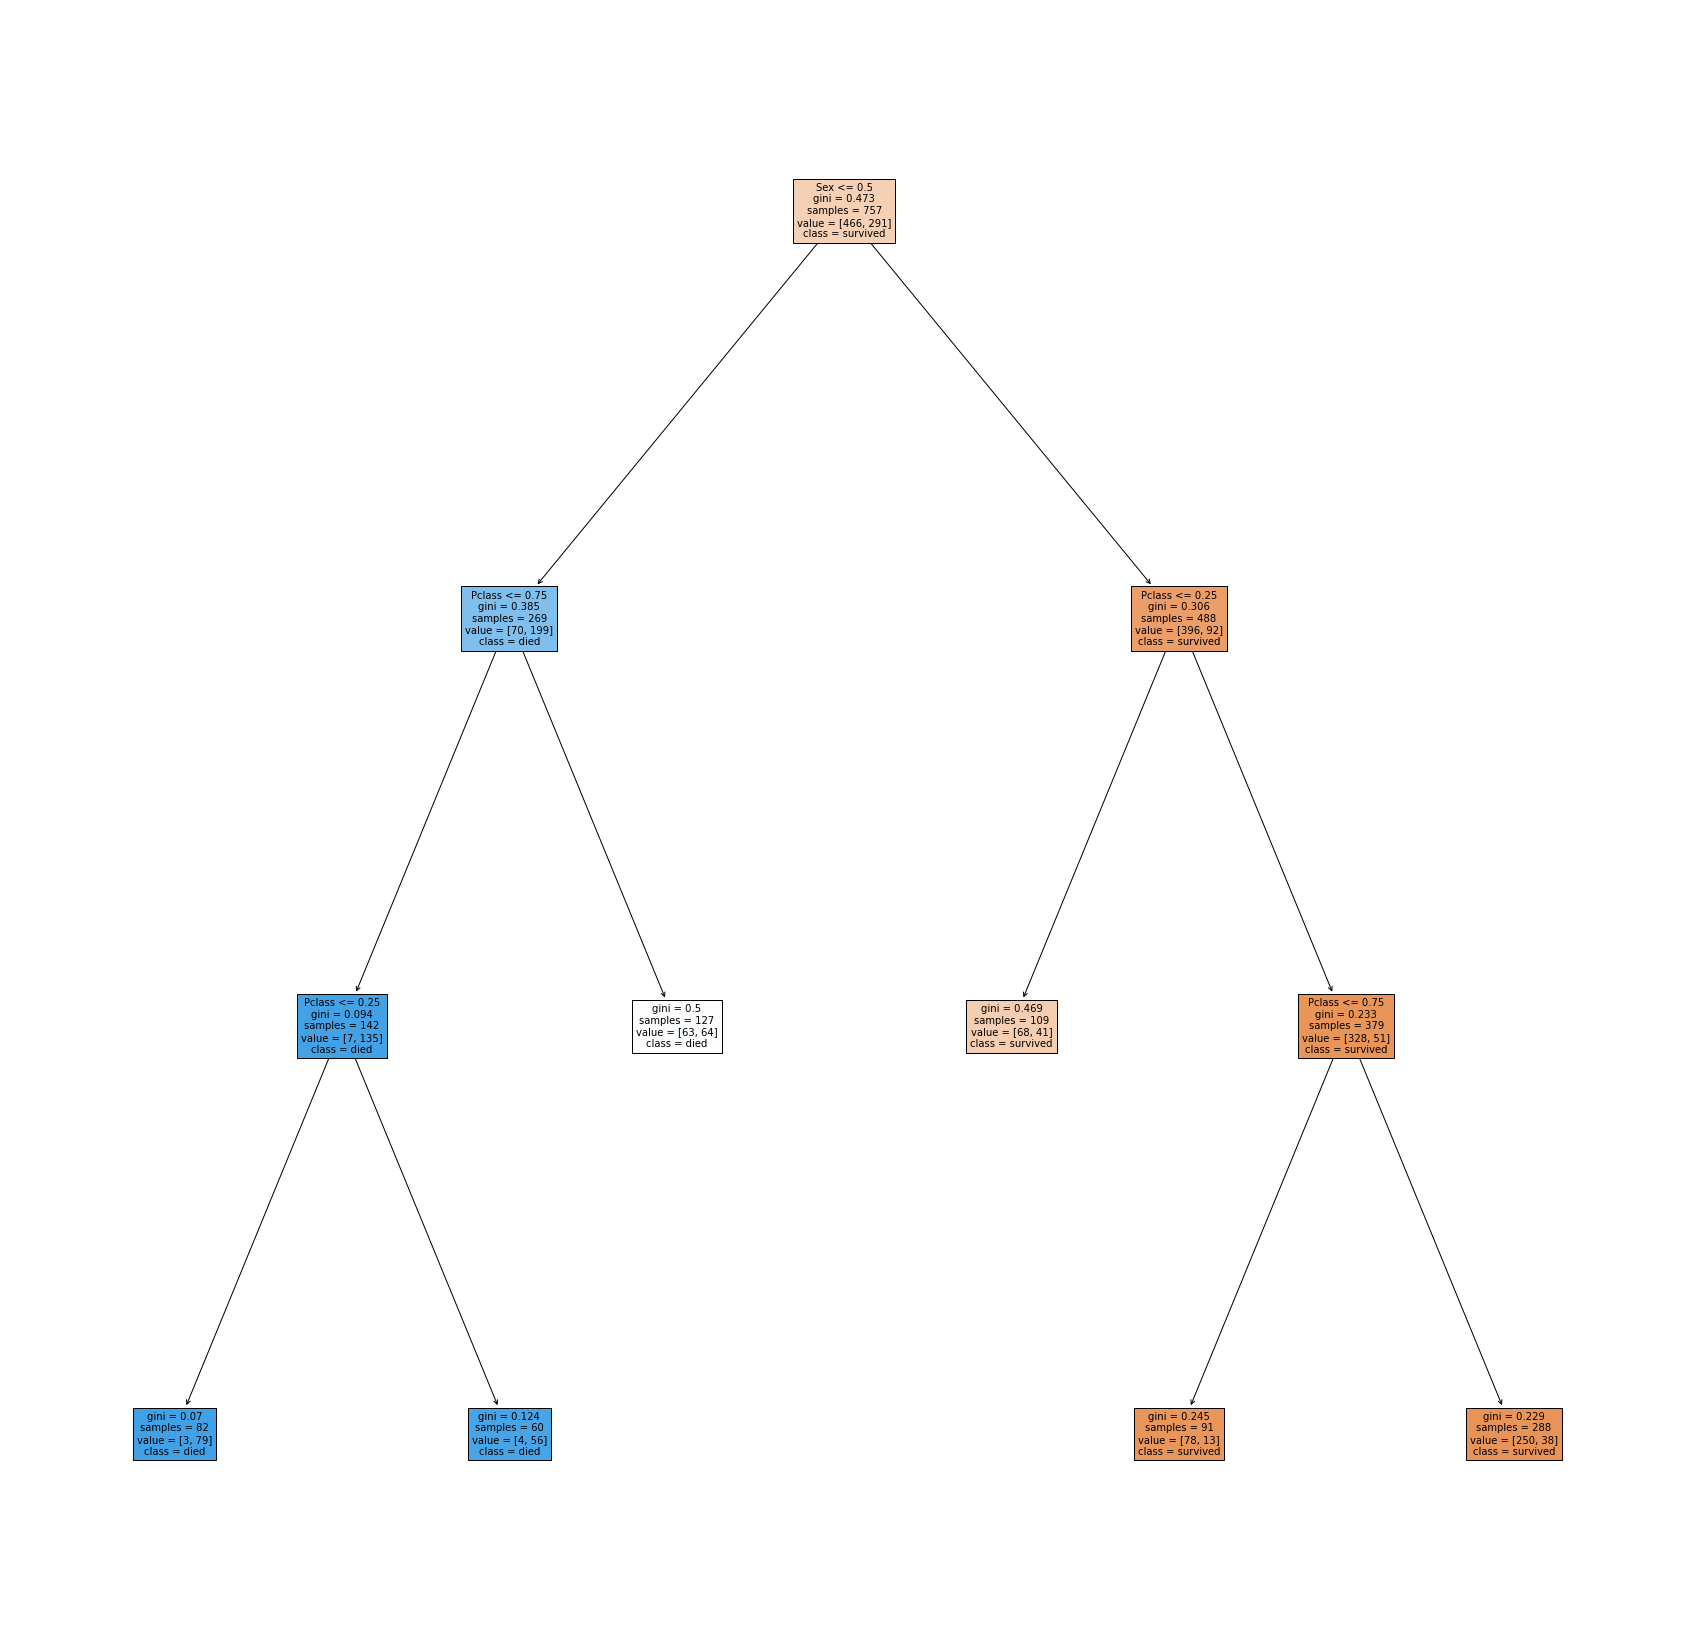

In [34]:
fig, ax= plt.subplots(figsize=(30,30))
tree.plot_tree(DT_classifier, feature_names=['Pclass', 'Sex', 'Age', 'SibSp', "Parch", "Fare"],
               class_names=["survived","died"],fontsize=10, filled=True)
plt.show()

## Random forest

### Training dataset

We'll repeate the last part with a random forest model 

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,y_train)

<ipython-input-36-7dd5aeab8950>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train,y_train)


RandomForestClassifier()

In [37]:
y_rf_predict = rf_classifier.predict(X_train)
y_rf_predict

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,

In [38]:
rf_accuracy = accuracy_score(y_train,y_rf_predict)
print(f'Accuracy : {rf_accuracy}')

Accuracy : 0.7859973579920739


In [39]:
class_rep_rf = classification_report(y_train,y_rf_predict)
print(class_rep_rf)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       466
           1       0.74      0.68      0.71       291

    accuracy                           0.79       757
   macro avg       0.78      0.77      0.77       757
weighted avg       0.78      0.79      0.78       757



In [40]:
confusion_matrix_rf = confusion_matrix(y_train,y_rf_predict)
conf_mat_rf = pd.DataFrame(confusion_matrix_rf)
conf_mat_rf

,0,1
0,396,70
1,92,199


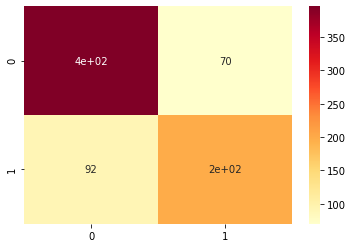

In [41]:
sns.heatmap(conf_mat_rf, label=True, annot=True, cmap ='YlOrRd')
plt.show()

### Testing dataset

In [42]:
y_rf_pred_test = rf_classifier.predict(X_test)
y_rf_pred_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0])

In [43]:
rf_test_accuracy = accuracy_score(y_test,y_rf_pred_test)
print(f'Accuracy : {rf_test_accuracy}')

Accuracy : 0.7910447761194029


In [44]:
class_rep_rf_test = classification_report(y_test,y_rf_pred_test)
print(class_rep_rf_test)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        83
           1       0.76      0.67      0.71        51

    accuracy                           0.79       134
   macro avg       0.78      0.77      0.77       134
weighted avg       0.79      0.79      0.79       134



In [45]:
confusion_matrix_rf_test = confusion_matrix(y_test,y_rf_pred_test)
conf_mat_rf_test = pd.DataFrame(confusion_matrix_rf_test)
conf_mat_rf_test

,0,1
0,72,11
1,17,34


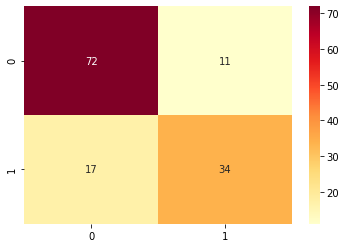

In [46]:
sns.heatmap(conf_mat_rf_test, label=True, annot=True, cmap ='YlOrRd')
plt.show()

### Hyperparameter tunning

In [47]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [48]:
n_estimators = [10,100,1000]
max_features = ['sqrt', 'log2']
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

y_pred_hyperparams = grid_search.predict(X_test)
print(y_pred_hyperparams)

rf_hyperparams_accuracy = accuracy_score(y_test,y_pred_hyperparams)
print(f'Accuracy : {rf_hyperparams_accuracy}')

Best: 0.776298 using {'max_features': 'sqrt', 'n_estimators': 10}
0.776298 (0.039538) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.772784 (0.038230) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.772345 (0.038275) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.775848 (0.040256) with: {'max_features': 'log2', 'n_estimators': 10}
0.773222 (0.039248) with: {'max_features': 'log2', 'n_estimators': 100}
0.773673 (0.038691) with: {'max_features': 'log2', 'n_estimators': 1000}
[1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0
 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0]
Accuracy : 0.7910447761194029


/Users/julienfresnel/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
